In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.utils import load_img,img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import ResNet101V2

K.clear_session()

In [ ]:
train_folder = "/content/drive/MyDrive/Dataset/Train/Train"
test_folder = "/content/drive/MyDrive/Dataset/Test/Test"
val_folder = "/content/drive/MyDrive/Dataset/Validation/Validation"

In [ ]:
from tensorflow.keras.applications import Xception
def no_of_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
no_of_files(os.path.join(test_folder))

There are 50 files in Healthy
There are 50 files in Powdery
There are 50 files in Rust


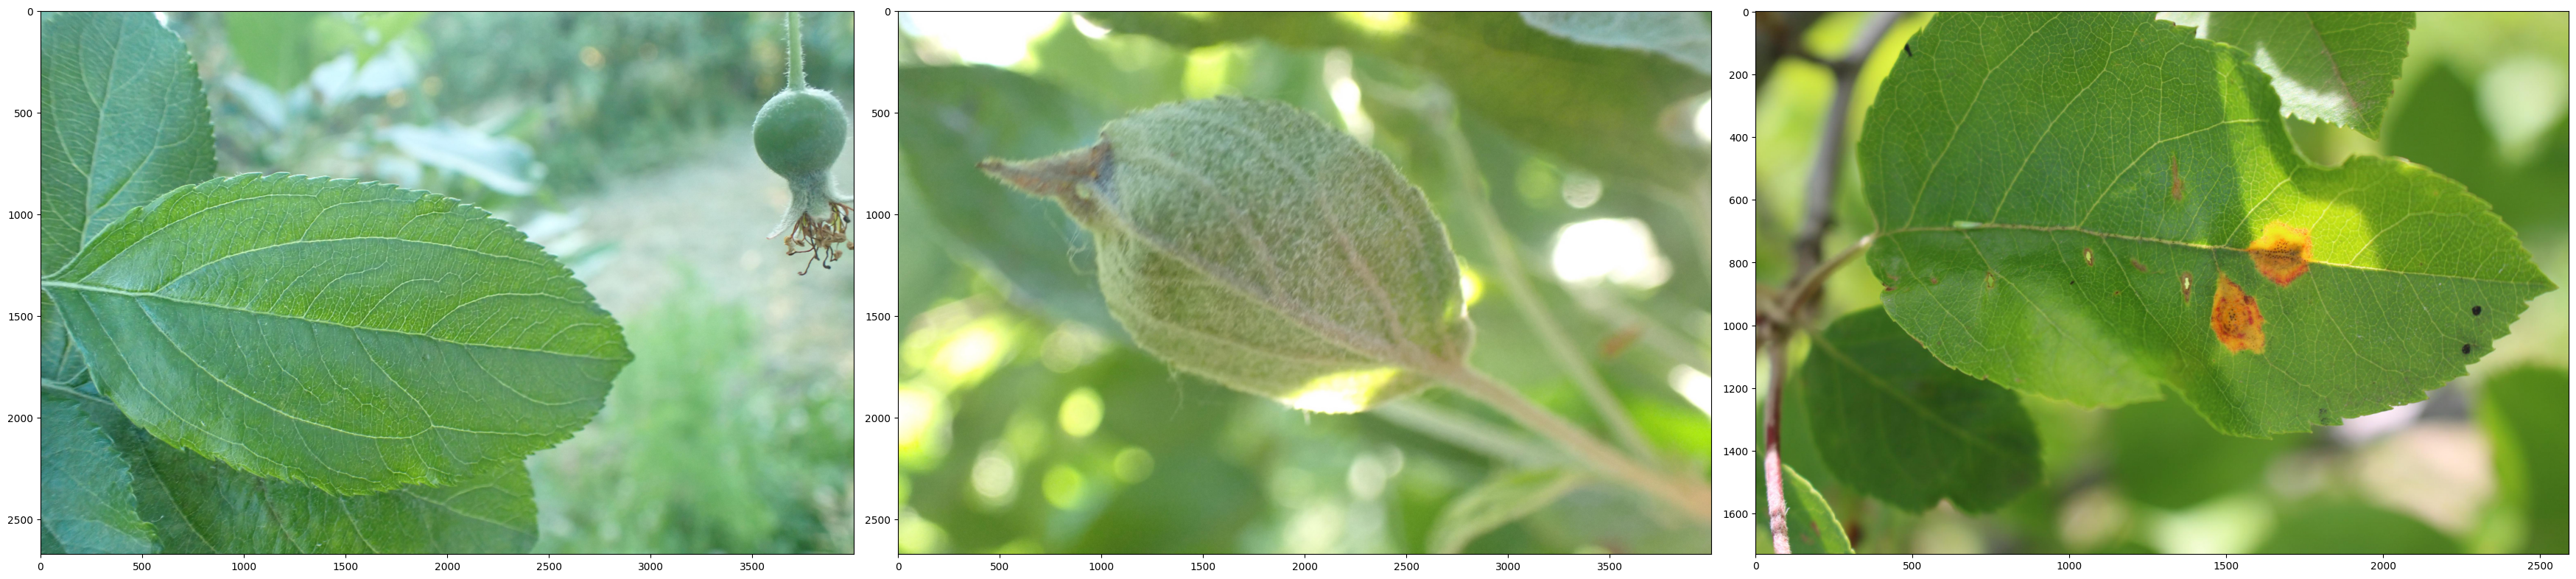

In [ ]:
images = []

for selected_folder in sorted(os.listdir(train_folder)):
    cell = os.listdir(train_folder + '/' + selected_folder)
    folder_selected = np.random.choice(cell)
    images.append(os.path.join(train_folder,selected_folder,folder_selected))
                                     
fig=plt.figure(1, figsize=(70, 50))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(6, 6, subplot+1)
    plt.imshow(imgs)
    
plt.tight_layout()

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 48,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (224, 224),
    batch_size = 48, 
    class_mode = 'categorical')

Found 1333 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
modelr=Xception(input_shape=[224,224,3],weights='imagenet',include_top=False)
for layer in modelr.layers:
  layer.trainable=False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
#modelr=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
#for layer in modelr.layers:
 #   layer.trainable=False

In [ ]:
model=Sequential()
model.add(modelr)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 batch_normalization_5 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [ ]:
modelr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)   
)

Epoch 1/15
28/28 [==============================] - 815s 29s/step - loss: 0.4810 - accuracy: 0.8260 - val_loss: 0.7293 - val_accuracy: 0.8333
Epoch 2/15
28/28 [==============================] - 213s 8s/step - loss: 0.1852 - accuracy: 0.9332 - val_loss: 0.3856 - val_accuracy: 0.9133
Epoch 3/15
28/28 [==============================] - 214s 8s/step - loss: 0.1079 - accuracy: 0.9692 - val_loss: 0.3712 - val_accuracy: 0.9133
Epoch 4/15
28/28 [==============================] - 216s 8s/step - loss: 0.0739 - accuracy: 0.9715 - val_loss: 0.3191 - val_accuracy: 0.9067
Epoch 5/15
28/28 [==============================] - 219s 8s/step - loss: 0.0544 - accuracy: 0.9850 - val_loss: 0.3027 - val_accuracy: 0.9133
Epoch 6/15
28/28 [==============================] - 216s 8s/step - loss: 0.0311 - accuracy: 0.9917 - val_loss: 0.3079 - val_accuracy: 0.9067
Epoch 7/15
28/28 [==============================] - 217s 8s/step - loss: 0.0256 - accuracy: 0.9910 - val_loss: 0.3305 - val_accuracy: 0.9133
Epoch 8/15
2

In [ ]:

from tensorflow.keras.models import load_model
#model.save("/content/drive/MyDrive/Dataset/trainedmodelXception_plant.h5")
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Dataset/trainedmodelXception_plant.h5")
new_model.summary()
#model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 dropout_18 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_30 (Bat  (None, 100352)           401408    
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 1024)              102761472 
                                                                 
 batch_normalization_31 (Bat  (None, 1024)             4096      
 chNormalization)                                     

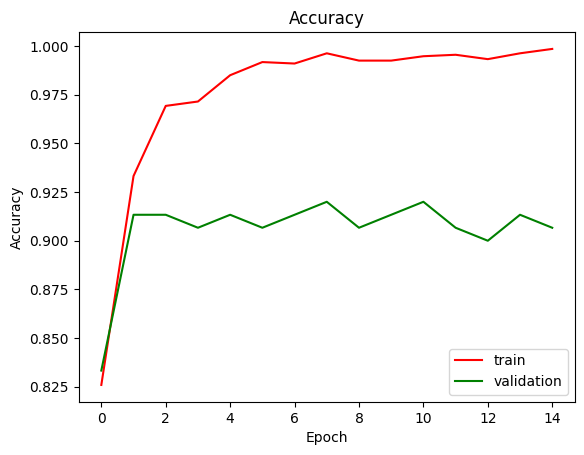

In [ ]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

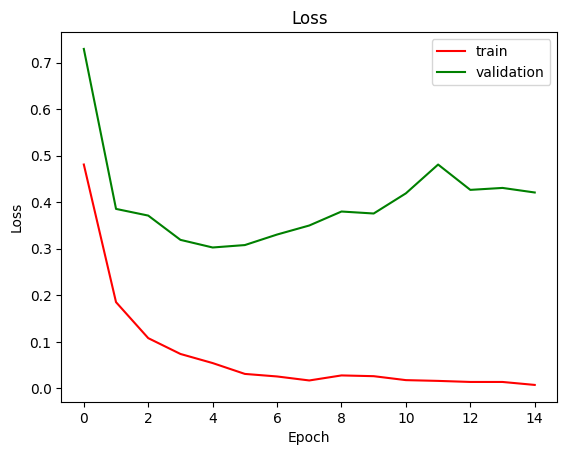

In [ ]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
new_model.evaluate(test_set)

4/4 [==============================] - 54s 12s/step - loss: 0.4208 - accuracy: 0.9067


[0.420846164226532, 0.9066666960716248]

1/1 [==============================] - 0s 36ms/step
Pridicted Class Rust


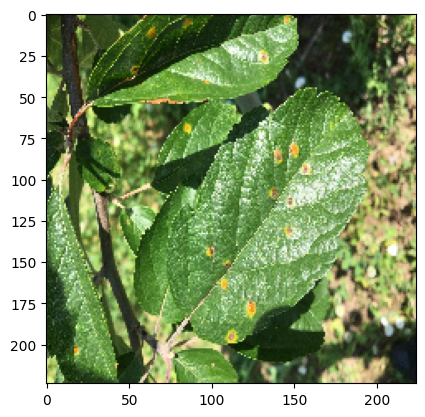

In [ ]:
dic=training_set.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    predict_x=new_model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    print ('Pridicted Class',icd[classes_x[0]])
test_img='/content/drive/MyDrive/Dataset/Validation/Validation/Rust/881b4dba7731b362.jpg'
pic=load_img(test_img,target_size=(224,224,3))
plt.imshow(pic)
output(test_img)